In [14]:
import numpy as np
import matplotlib.pyplot as plt

from pydrake.geometry.optimization import HPolyhedron
from pydrake.solvers import MosekSolver
from pydrake.trajectories import PiecewisePolynomial

from gcs.bezier import BezierGCS
from gcs.linear import LinearGCS
from gcs.rounding import *

# Diamond Obstacle

INFO:drake:Solved GCS shortest path using MOSEK with convex_relaxation=true and preprocessing=false and no rounding.
INFO:drake:Solved GCS shortest path using MOSEK with convex_relaxation=true and preprocessing=false and rounding.
INFO:drake:Found 8 unique paths, discarded 92 duplicate paths.
INFO:drake:Finished 8 rounding solutions with MOSEK.
INFO:drake:Solved GCS shortest path using MOSEK with convex_relaxation=true and preprocessing=false and no rounding.
INFO:drake:Solved GCS shortest path using MOSEK with convex_relaxation=true and preprocessing=false and rounding.
INFO:drake:Found 8 unique paths, discarded 92 duplicate paths.
INFO:drake:Finished 8 rounding solutions with MOSEK.


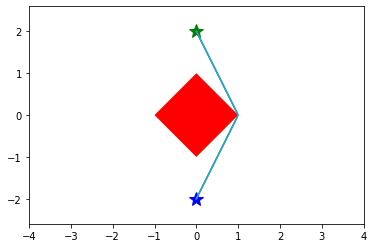

In [15]:
x_start = np.array([0., -2.])
x_goal = np.array([0., 2.])
convex_relaxation = True

A_bl = np.array([[-1, 0], [0, -1], [1, 1]])
A_br = np.array([[1, 0], [0, -1], [-1, 1]])
A_tl = np.array([[-1, 0], [0, 1], [1, -1]])
A_tr = np.array([[1, 0], [0, 1], [-1, -1]])
b = np.array([3, 3, -1])

regions = [
    HPolyhedron(A_bl, b),
    HPolyhedron(A_br, b),
    HPolyhedron(A_tl, b),
    HPolyhedron(A_tr, b),
]


plt.figure()
plt.plot(x_start[0], x_start[1], 'b*', markersize=15)
plt.plot(x_goal[0], x_goal[1], 'g*', markersize=15)
plt.fill([1, 0, -1, 0], [0, 1, 0, -1], 'r')
# ax[0].fill([1, 1, -1, -1], [-1, 1, 1, -1], 'r')
plt.axis('equal')
plt.gca().set_xlim(-4, 4)
plt.gca().set_ylim(-4, 4)

l_gcs = LinearGCS(regions)
l_gcs.addSourceTarget(x_start, x_goal)
l_gcs.setSolver(MosekSolver())
waypoints = l_gcs.SolvePath(convex_relaxation)[0]
t_knots = np.linspace(0, 1,  waypoints.shape[1])
lin_traj = PiecewisePolynomial.FirstOrderHold(t_knots, waypoints)

samples = np.linspace(lin_traj.start_time(), lin_traj.end_time())
values = np.squeeze([lin_traj.value(s) for s in samples])
plt.plot(values[:, 0], values[:, 1], "m-")

b_gcs = BezierGCS(regions, order=5, continuity=2)
b_gcs.addTimeCost(1)
b_gcs.addPathLengthCost(1)
b_gcs.addSourceTarget(x_start, x_goal)
b_gcs.setSolver(MosekSolver())
bezier_traj = b_gcs.SolvePath(convex_relaxation)[0]

samples = np.linspace(bezier_traj.start_time(), bezier_traj.end_time())
values = np.squeeze([bezier_traj.value(s) for s in samples])
plt.plot(values[:, 0], values[:, 1], "c-")

# Square Obstacle

INFO:drake:Solved GCS shortest path using MOSEK with convex_relaxation=true and preprocessing=false and no rounding.
INFO:drake:Solved GCS shortest path using MOSEK with convex_relaxation=true and preprocessing=false and rounding.
INFO:drake:Found 2 unique paths, discarded 98 duplicate paths.
INFO:drake:Finished 2 rounding solutions with MOSEK.
INFO:drake:Solved GCS shortest path using MOSEK with convex_relaxation=true and preprocessing=false and no rounding.
INFO:drake:Solved GCS shortest path using MOSEK with convex_relaxation=true and preprocessing=false and rounding.
INFO:drake:Found 2 unique paths, discarded 98 duplicate paths.
INFO:drake:Finished 2 rounding solutions with MOSEK.
INFO:drake:Solved GCS shortest path using MOSEK with convex_relaxation=true and preprocessing=false and no rounding.
INFO:drake:Solved GCS shortest path using MOSEK with convex_relaxation=true and preprocessing=false and no rounding.
INFO:drake:Solved GCS shortest path using MOSEK with convex_relaxation=t

Problem
  Name                   :                 
  Objective sense        : minimize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 1255            
  Affine conic cons.     : 45 (135 rows)
  Disjunctive cons.      : 0               
  Cones                  : 0               
  Scalar variables       : 392             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 376
Eliminator terminated.
Eliminator started.
Freed constraints in eliminator : 1
Eliminator terminated.
Eliminator - tries                  : 2                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - primal attempts        : 1                 successes     

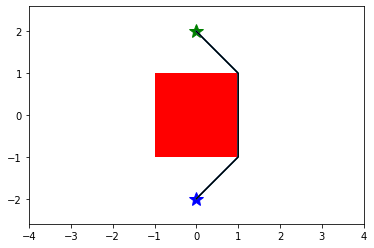

In [16]:
x_start = np.array([0., -2.])
x_goal = np.array([0., 2.])
convex_relaxation = True

regions = [
    HPolyhedron.MakeBox([-4, -4],[4, -1]), # Bottom
    HPolyhedron.MakeBox([-4, -4],[-1, 4]), # Left
    HPolyhedron.MakeBox([1, -4],[4, 4]),   # Right
    HPolyhedron.MakeBox([-4, 1],[4, 4]),   # Top
]


plt.figure()
plt.plot(x_start[0], x_start[1], 'b*', markersize=15)
plt.plot(x_goal[0], x_goal[1], 'g*', markersize=15)
plt.fill([1, 1, -1, -1], [-1, 1, 1, -1], 'r')
plt.axis('equal')
plt.gca().set_xlim(-4, 4)
plt.gca().set_ylim(-4, 4)

l_gcs = LinearGCS(regions)
l_gcs.addSourceTarget(x_start, x_goal)
l_gcs.setSolver(MosekSolver())
waypoints = l_gcs.SolvePath(convex_relaxation)[0]
t_knots = np.linspace(0, 1,  waypoints.shape[1])
lin_traj = PiecewisePolynomial.FirstOrderHold(t_knots, waypoints)

samples = np.linspace(lin_traj.start_time(), lin_traj.end_time())
values = np.squeeze([lin_traj.value(s) for s in samples])
plt.plot(values[:, 0], values[:, 1], "m-")

b_gcs = BezierGCS(regions, order=5, continuity=2)
b_gcs.addTimeCost(1)
b_gcs.addPathLengthCost(1)
b_gcs.addSourceTarget(x_start, x_goal)
b_gcs.setPaperSolverOptions()
b_gcs.setSolver(MosekSolver())
bezier_traj = b_gcs.SolvePath(convex_relaxation)[0]

samples = np.linspace(bezier_traj.start_time(), bezier_traj.end_time())
values = np.squeeze([bezier_traj.value(s) for s in samples])
plt.plot(values[:, 0], values[:, 1], "c-")

# Alternate rounding strategy
b_gcs = BezierGCS(regions, order=5, continuity=2)
b_gcs.addTimeCost(1)
b_gcs.addPathLengthCost(1)
b_gcs.addSourceTarget(x_start, x_goal)
b_gcs.setPaperSolverOptions()
b_gcs.setSolver(MosekSolver())
b_gcs.setRoundingStrategy([greedyForwardPathSearch, greedyBackwardPathSearch])
bezier_traj = b_gcs.SolvePath(convex_relaxation)[0]

samples = np.linspace(bezier_traj.start_time(), bezier_traj.end_time())
values = np.squeeze([bezier_traj.value(s) for s in samples])
plt.plot(values[:, 0], values[:, 1], "k-")